

![title](1.png)

# 本次目標：預測患者是否為肝臟疾病

# 數據包含：
患者的年齡

患者的性別

總膽紅素

直接膽紅素

鹼性磷酸酶

三聚氰胺氨基轉移酶

天冬氨酸氨基轉移酶

總勳章

白蛋白

白蛋白和球蛋白比率


## 目標欄位：


* 數據集Dataset：用於將數據分成兩組（患有肝病或無疾病的患者）的字段

* 有肝臟疾病為1 沒有肝臟疾病為2 



### 該數據集包含416份記錄和167份從印度安得拉邦東北部收集的非肝病患者記錄。 
### “數據集”列是用於將組分為肝病（肝病）或不分組（無疾病）的類別標籤。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

sns.set_style("whitegrid") # 設置畫圖的風格
sns.set_context("paper") 
df = pd.read_csv("indian_liver_patient.csv") #讀取CSV檔
df.head()

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3                        0.90        1  
1      3.2                        0.74        1  
2      3.3                        0.89        1  
3      3.4                        1.00        1  
4      2.4                        0.40        1

## 查看目標 : << Dataset>> 佔資料的比例有多少
## 以圖表呈現

Dataset欄位的資料型態為<class 'numpy.int64'>


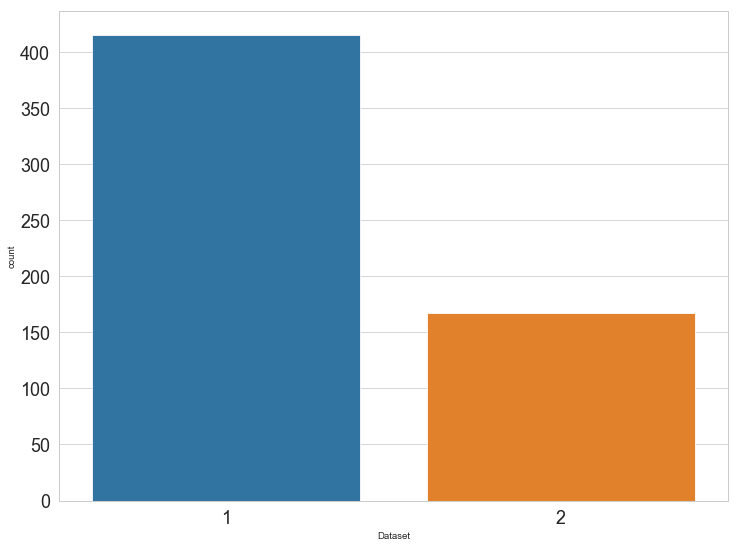

In [2]:
df['Dataset'].value_counts

name = 'Dataset'

def count(name):
    test_list = []
    c = Counter(df[name])
    for i in df[name]:
        test_list.append(i)
    return c.most_common() , test_list ,type(df[name][0])

ans = count(name)
ans[0]
print(str(name)+"欄位的資料型態為"+str(ans[2]))
# 畫圖可參考 https://ithelp.ithome.com.tw/articles/10186624

df2 = pd.DataFrame({name: ans[1]})
f, ax = plt.subplots(figsize=(12, 9))
ax.tick_params(labelsize=18)
sns.countplot(x = name, data = df2)

## 檢查資料缺失情況,以百分比

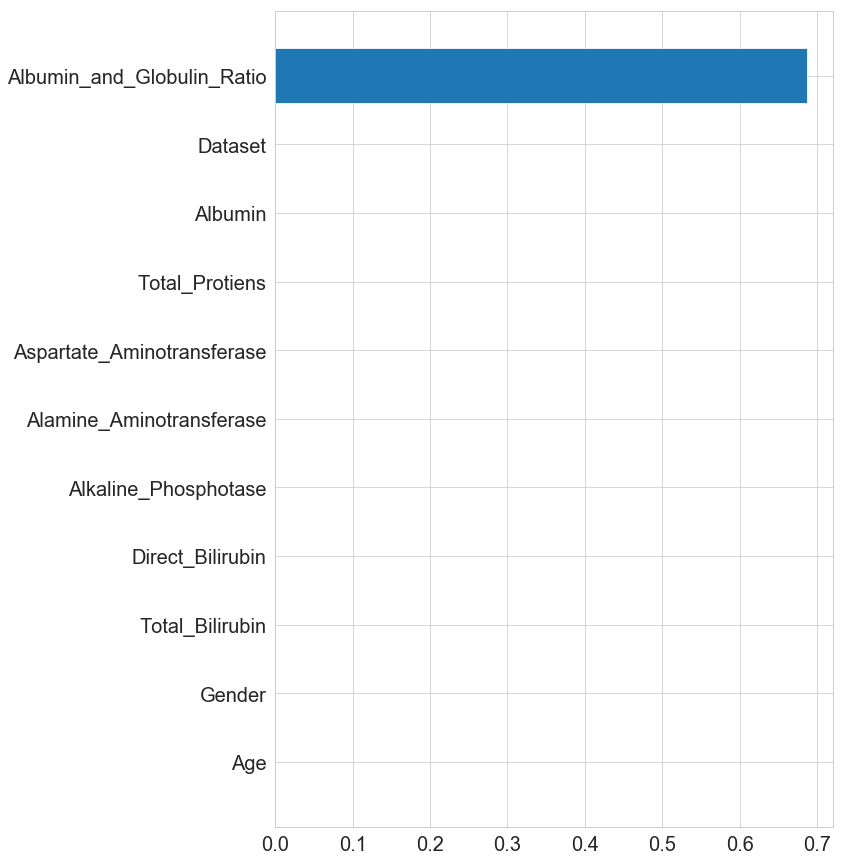

In [3]:
plt.figure(figsize=(10,15))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
missing = pd.DataFrame({'column':df.columns ,'na_percent':df.isnull().sum()/len(df)*100})
missing.sort_values('na_percent',inplace=True)
plt.barh(missing['column'],width=missing['na_percent']);

## drop 缺失值

In [4]:
## dropna可去掉包含nan的行或列
df.dropna(
    axis=0,     # 0: 对行进行操作; 1: 对列进行操作
    how='any',   # 'any': 只要存在 NaN 就 drop 掉; 'all': 必须全部是 NaN 才 drop 
    inplace=True)
df = df.reset_index(drop=True)

## 檢查是否還有缺失值
df.isnull().sum(axis=0)

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

## One hot encoding

In [5]:
df2 = pd.get_dummies(df)


In [6]:
df2.head()

Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65              0.7               0.1                   187   
1   62             10.9               5.5                   699   
2   62              7.3               4.1                   490   
3   58              1.0               0.4                   182   
4   72              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  Gender_Female  Gender_Male  
0      3.3                        0.90        1              1            0  
1      3.2                        0.74        1              0            1  
2      3.3                        0.89        1              0            1  
3      3.4                        1.00        1              0            1  
4      2.4                        0.40        1              0            1

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

## 標準化

In [8]:
y = df2['Dataset']
df2 = df2.drop('Dataset',axis=1)
X = preprocessing.scale(df2)

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.7,
                                                 random_state=2)
X_train.shape,X_test.shape

((173, 11), (406, 11))

## SVM簡介：

### SVM是一種監督式的學習方法，用統計風險最小化的原則來估計一個分類的超平面(hyperplane)


![title](2.png)

### SVM在找Optimal hyperplane就是希望區隔兩類之間的邊界(2/|w|)可以越大越好。

![title](3.png)

[參考資料連結](https://medium.com/@chih.sheng.huang821/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E6%94%AF%E6%92%90%E5%90%91%E9%87%8F%E6%A9%9F-support-vector-machine-svm-%E8%A9%B3%E7%B4%B0%E6%8E%A8%E5%B0%8E-c320098a3d2e)

## 使用SVM預測

In [26]:
from sklearn.svm import SVC

model = SVC()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           1       0.85      0.75      0.80       336
           2       0.24      0.37      0.29        70

   micro avg       0.68      0.68      0.68       406
   macro avg       0.54      0.56      0.54       406
weighted avg       0.75      0.68      0.71       406



c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


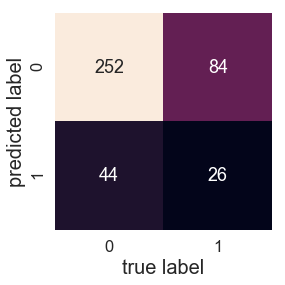

In [27]:
mat = confusion_matrix(y_test, y_pred)

sns.set(font_scale=1.5)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)

plt.xlabel('true label',fontsize=20)
plt.ylabel('predicted label',fontsize=20);

In [28]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.6847290640394089
